#Trabajo Práctico Clustear AI 2021 - Grupo 14


##Imports


In [ ]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import warnings; warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importamos el dataset para el trabajo
mn = pd.read_csv(r'/content/drive/MyDrive/UTN J/Ciencia de datos/TP Final/monumentos.csv', delimiter=';')

##Análisis preliminar

In [ ]:
#Realizamos una visualización previa de la composición dataset

In [ ]:
mn.head()

,ID,OBJETO_OBRA,CANTIDAD_OBJETOS,MATERIAL,DENOMINACION_SIMBOLIZA,AUTORES,UBICACION,OBSERVACIONES,DIRECCION_NORMALIZADA,CALLE,ALTURA,BARRIO,COMUNA,CODIGA_POSTAL,CODIGO_POSTAL_ARGENTINO,LATITUD,LONGITUD
0,11,ESTATUA,1,MARMOL DE CORDOBA,INTERIORES,"ALVAREZ LOMBA, A.",NaN,NaN,BOEDO AV. 883,BOEDO AV.,883.0,BOEDO,COMUNA 5,1218.0,C1218AAE,-34.623713,-58.416328
1,14,ESTATUA,1,MARMOL,EL TRABAJO,"ANDINA, EMILIO",NaN,NaN,CASEROS AV. Y MONTEAGUDO,CASEROS AV.,NaN,PARQUE PATRICIOS,COMUNA 4,NaN,NaN,-34.637117,-58.405611
2,15,ESTATUA,1,BRONCE,?USTA (FUENTE INCAICA),"ANDINA, EMILIO",NaN,NaN,"PERON, EVA AV. 1410","PERON, EVA AV.",1410.0,PARQUE CHACABUCO,COMUNA 7,1406.0,C1406HMP,-34.632903,-58.444763
3,17,MASTIL,1,GRANITO Y BRONCE,HOMENAJE A LA BANDERA,"PERLOTI, LUIS",PLAZA VELEZ SARSFIELD,PLAZA VELEZ SARSFIELD,AVELLANEDA AV. 3800,AVELLANEDA AV.,3800.0,FLORESTA,COMUNA 10,1407.0,C1407EJR,-34.629203,-58.482175
4,18,MONUMENTO,1,BRONCE Y MAMPOSTERIA,CEFERINO NAMUNCURA,"ARMAS, ARMANDO",PZTA CEFERINO NAMUNCURA,PZTA CEFERINO NAMUNCURA,ARREGUI AV. 6400,ARREGUI AV.,6400.0,VERSALLES,COMUNA 10,1408.0,C1408AVV,-34.628472,-58.524018


In [ ]:
mn.describe()

,ID,CANTIDAD_OBJETOS,ALTURA,CODIGA_POSTAL,LATITUD,LONGITUD
count,2233.000000,2233.000000,1513.000000,1504.000000,2103.000000,2103.000000
mean,1117.000000,1.090909,2611.686054,1310.318484,-34.601172,-58.422030
std,644.755897,0.929539,2388.149358,163.142364,0.030049,0.039867
min,1.000000,1.000000,1.000000,1001.000000,-34.698431,-58.528996
25%,559.000000,1.000000,1145.000000,1113.750000,-34.619043,-58.449277
50%,1117.000000,1.000000,2300.000000,1425.000000,-34.597555,-58.411933
75%,1675.000000,1.000000,3101.000000,1425.000000,-34.576826,-58.391372
max,2233.000000,34.000000,16802.000000,1440.000000,-34.536107,-58.353460


In [ ]:
mn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2233 non-null   int64  
 1   OBJETO_OBRA              2233 non-null   object 
 2   CANTIDAD_OBJETOS         2233 non-null   int64  
 3   MATERIAL                 2221 non-null   object 
 4   DENOMINACION_SIMBOLIZA   2232 non-null   object 
 5   AUTORES                  1320 non-null   object 
 6   UBICACION                2216 non-null   object 
 7   OBSERVACIONES            2216 non-null   object 
 8   DIRECCION_NORMALIZADA    2114 non-null   object 
 9   CALLE                    2114 non-null   object 
 10  ALTURA                   1513 non-null   float64
 11  BARRIO                   1921 non-null   object 
 12  COMUNA                   2113 non-null   object 
 13  CODIGA_POSTAL            1504 non-null   float64
 14  CODIGO_POSTAL_ARGENTINO 

In [ ]:
##Vemos cuantas filas y columnas tiene nuestro dataset
mn.shape


(2233, 17)

In [ ]:
#Buscamos los valores nulos dentro de nuestro dataset
cant_NaN = mn.isnull().sum()
print(cant_NaN,'\r\n')

ID                           0
OBJETO_OBRA                  0
CANTIDAD_OBJETOS             0
MATERIAL                    12
DENOMINACION_SIMBOLIZA       1
AUTORES                    913
UBICACION                   17
OBSERVACIONES               17
DIRECCION_NORMALIZADA      119
CALLE                      119
ALTURA                     720
BARRIO                     312
COMUNA                     120
CODIGA_POSTAL              729
CODIGO_POSTAL_ARGENTINO    729
LATITUD                    130
LONGITUD                   130
dtype: int64 



In [ ]:
#Ordenamos de manera descendente los datos nulos
total = mn.isnull().sum().sort_values(ascending=False)
print (total)

AUTORES                    913
CODIGO_POSTAL_ARGENTINO    729
CODIGA_POSTAL              729
ALTURA                     720
BARRIO                     312
LONGITUD                   130
LATITUD                    130
COMUNA                     120
DIRECCION_NORMALIZADA      119
CALLE                      119
OBSERVACIONES               17
UBICACION                   17
MATERIAL                    12
DENOMINACION_SIMBOLIZA       1
CANTIDAD_OBJETOS             0
OBJETO_OBRA                  0
ID                           0
dtype: int64


In [ ]:
#Visualizamos el porcentaje 
percent = [(mn.isnull().sum()/mn.isnull().count()).sort_values(ascending=False)]
print(percent)

[AUTORES                    0.408867
CODIGO_POSTAL_ARGENTINO    0.326467
CODIGA_POSTAL              0.326467
ALTURA                     0.322436
BARRIO                     0.139722
LONGITUD                   0.058218
LATITUD                    0.058218
COMUNA                     0.053739
DIRECCION_NORMALIZADA      0.053292
CALLE                      0.053292
OBSERVACIONES              0.007613
UBICACION                  0.007613
MATERIAL                   0.005374
DENOMINACION_SIMBOLIZA     0.000448
CANTIDAD_OBJETOS           0.000000
OBJETO_OBRA                0.000000
ID                         0.000000
dtype: float64]


##Limpieza


In [ ]:
#Definimos quitar las columnas "AUTORES" por ser la de mayor porcentaje en NaNs.
mn.drop(['AUTORES'], axis = 'columns', inplace=True)

In [ ]:
#Definimos quitar las columnas "OBSERVACIONES", "DIRECCION_NORMALIZADA", "ID", "UBICACION", "DENOMINACION_SIMBOLIZA",
#"OBJETO_OBRA" y "CODIGO_POSTAL_ARGENTINO"
#porque quedan fuera de nuestro criterio de analisis. 
mn.drop(['ID','OBSERVACIONES','DIRECCION_NORMALIZADA', 'CODIGO_POSTAL_ARGENTINO', 'OBJETO_OBRA','UBICACION','DENOMINACION_SIMBOLIZA' ],\
        axis = 'columns', inplace=True)

In [ ]:
#Revisamos como queda el dataset
mn.head()

,CANTIDAD_OBJETOS,MATERIAL,CALLE,ALTURA,BARRIO,COMUNA,CODIGA_POSTAL,LATITUD,LONGITUD
0,1,MARMOL DE CORDOBA,BOEDO AV.,883.0,BOEDO,COMUNA 5,1218.0,-34.623713,-58.416328
1,1,MARMOL,CASEROS AV.,NaN,PARQUE PATRICIOS,COMUNA 4,NaN,-34.637117,-58.405611
2,1,BRONCE,"PERON, EVA AV.",1410.0,PARQUE CHACABUCO,COMUNA 7,1406.0,-34.632903,-58.444763
3,1,GRANITO Y BRONCE,AVELLANEDA AV.,3800.0,FLORESTA,COMUNA 10,1407.0,-34.629203,-58.482175
4,1,BRONCE Y MAMPOSTERIA,ARREGUI AV.,6400.0,VERSALLES,COMUNA 10,1408.0,-34.628472,-58.524018


In [ ]:
##Revisamos nuevamente los valores nulos que nos quedan
total1 = mn.isnull().sum().sort_values(ascending=False)
print (total1)

CODIGA_POSTAL       729
ALTURA              720
BARRIO              312
LONGITUD            130
LATITUD             130
COMUNA              120
CALLE               119
MATERIAL             12
CANTIDAD_OBJETOS      0
dtype: int64


In [ ]:
## Eliminamos las filas que tienen NaN en Comuna
mn.dropna(subset = ["COMUNA"], inplace=True)

In [ ]:
## Ajustamos un valor con variable erronea
mn['COMUNA'] = mn['COMUNA'].str.replace('COMUNA6','COMUNA 6')

In [ ]:
# Verificamos como quedo el dataset
print(f'Nos quedamos con un dataset de {mn.shape[0]} filas x{mn.shape[1]} columnas')

Nos quedamos con un dataset de 2113 filas x9 columnas


##Análisis exploratorio

In [ ]:
##Vemos las cantidades de monumentos por comuna
mn['COMUNA'].value_counts()

COMUNA 14    565
COMUNA 1     413
COMUNA 2     164
COMUNA 4     160
COMUNA 13    115
COMUNA 15    115
COMUNA 7     102
COMUNA 3      90
COMUNA 9      79
COMUNA 8      70
COMUNA 12     64
COMUNA 6      59
COMUNA 10     53
COMUNA 11     47
COMUNA 5      17
Name: COMUNA, dtype: int64

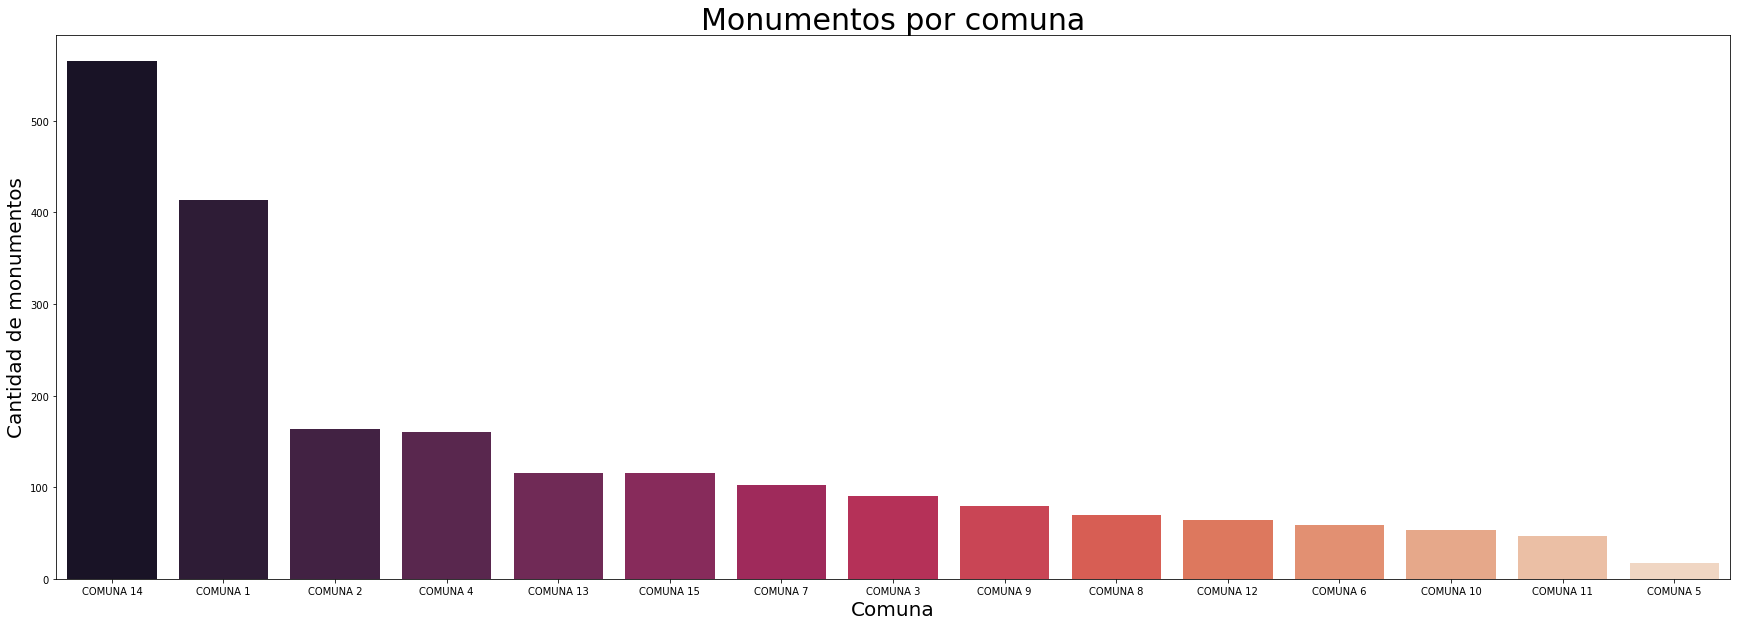

In [ ]:
##Graficamos la cuenta de monumentos según comuna
plt.figure(figsize=(30,10))
ax=sns.countplot(x=mn.COMUNA, data=mn.COMUNA, palette='rocket', order= mn['COMUNA'].value_counts().index )
plt.xlabel("Comuna", size =20)
plt.ylabel("Cantidad de monumentos", size=20)
plt.title ("Monumentos por comuna", size=30)
plt
sns.set({'figure.figsize':(20,10)})

In [ ]:
##Revisamos la cantidad de veces que se repiten los materiales en el data set
mn_mat_count=mn.MATERIAL.value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(mn_mat_count)

BRONCE Y MAMPOSTERIA          611
BRONCE                        412
MARMOL                        259
CEMENTO PATINADO              179
MAMPOSTERIA                   105
HIERRO FUNDIDO                 54
HIERRO Y MAMPOSTERIA           42
HIERRO                         41
BRONCE Y GRANITO               40
BRONCE Y MARMOL                27
MAMPOSTERIA E HIERRO           27
GRANITO                        27
MARMOL Y MAMPOSTERIA           19
PIEDRA                         18
GRANITO Y BRONCE               16
MAMPOSTERIA Y MAYOLICA         14
BRONCE Y PIEDRA                12
CERAMICA                       11
ACERO INOXIDABLE               11
ALUMINIO                        9
ACRILICO                        9
FIBROCEMENTO                    8
CEMENTO                         6
GRANITO Y MAMPOSTERIA           5
FIBROCEMENTO Y MAMPOSTERIA      5
MAMPOSTERIA Y BRONCE            5
YESO                            5
BRONCE Y HORMIGON               4
CEMENTO BLANCO                  4
MARMOL RECONST

In [ ]:
#Cantidad de materiales
mn.mat = len(mn['MATERIAL'].unique()) 
print(f'En total hay {mn.mat} tipos de valores en "MATERIAL"\r\n')
print("\n", mn['MATERIAL'].unique())

En total hay 105 tipos de valores en "MATERIAL"


 ['MARMOL DE CORDOBA' 'MARMOL' 'BRONCE' 'GRANITO Y BRONCE'
 'BRONCE Y MAMPOSTERIA' 'MAMPOSTERIA' 'BRONCE Y GRANITO'
 'PIEDRA MAR DEL PLATA' 'BRONCE Y MARMOL' 'CEMENTO PATINADO'
 'GRANITO RECONSTITUIDO' 'MAMPOSTERIA E HIERRO' 'MAMPOSTERIA Y BRONCE'
 'HIERRO' 'HIERRO Y BRONCE' 'FIBROCEMENTO Y MAMPOSTERIA' 'GRANITO'
 'BRONCE Y PIEDRA' nan 'MARMOL Y MAMPOSTERIA' 'PIEDRA' 'CEMENTO BLANCO'
 'QUEBRACHO' 'HORMIGON' 'CERAMICA Y MAMPOSTERIA' 'PIEDRA TOBA'
 'MAMPOSTERIA Y MAYOLICA' 'HIERRO Y MAMPOSTERIA' 'HIERRO FORJADO'
 'MAMPOSTERIA Y LAJAS' 'ANTIMONIO' 'ALUMINIO' 'ACERO INOXIDABLE'
 'HIERRO Y VIDRIO' 'FIBROCEMENTO' 'GRANITO E HIERRO'
 'ACRILICO Y MAMPOSTERIA' 'CEMENTO' 'TERRACOTA' 'GRANITO Y CERAMICA'
 'MARMOL ONIX' 'HIERRO FUNDIDO' 'MARMOL Y BRONCE' 'PIEDRA PARIS'
 'BRONCE Y HORMIGON' 'CHAPA ANTICORADAL' 'COBRE' 'CERAMICA'
 'FIBRA POLIESTER' 'PIEDRA Y BRONCE' 'PIEDRA RECONSTITUIDA'
 'HORMIGON ARMADO' 'MAYOLICA Y MAMPOSTERIA' 'PINTURA AL OLEO'


In [ ]:
#Vemos los procentajes de los materiales
percent1 = [(mn_mat_count/mn_mat_count.sum()).sort_values(ascending=False)]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(percent1)

[BRONCE Y MAMPOSTERIA          0.290814
BRONCE                        0.196097
MARMOL                        0.123275
CEMENTO PATINADO              0.085198
MAMPOSTERIA                   0.049976
HIERRO FUNDIDO                0.025702
HIERRO Y MAMPOSTERIA          0.019990
HIERRO                        0.019515
BRONCE Y GRANITO              0.019039
MAMPOSTERIA E HIERRO          0.012851
GRANITO                       0.012851
BRONCE Y MARMOL               0.012851
MARMOL Y MAMPOSTERIA          0.009043
PIEDRA                        0.008567
GRANITO Y BRONCE              0.007615
MAMPOSTERIA Y MAYOLICA        0.006663
BRONCE Y PIEDRA               0.005712
CERAMICA                      0.005236
ACERO INOXIDABLE              0.005236
ALUMINIO                      0.004284
ACRILICO                      0.004284
FIBROCEMENTO                  0.003808
CEMENTO                       0.002856
MAMPOSTERIA Y BRONCE          0.002380
YESO                          0.002380
FIBROCEMENTO Y MAMPOSTER

In [ ]:
## Al ser 105 tipos de materiales buscamos disminuir esta variable categorica para poder representarla gráficamente.
## Los valores que representen un porcentaje menor al 1% de la totalidad de los materiales se catalogan como "OTROS"
mn['MATERIAL'] = mn['MATERIAL'].replace(['HORMIGON PATINADO',\
'MADERA',\
'MADERA E HIERRO',\
'ACRILICO Y MAMPOSTERIA',\
'MAMPOSTERIA Y CERAMICA',\
'AZULEJOS',\
'MAMPOSTERIA Y GRANITO',\
'BRONCE E HIERRO',\
'MAMPOSTERIA Y HIERRO',\
'BRONCE Y MADERA',\
'MAMPOSTERIA Y LAJAS',\
'CEDRO',\
'MAMPOSTERIA Y MAYOL.',\
'CHAPA ANTICORADAL',\
'MAMPOSTERIA Y PIEDRA',\
'FIBRA POLIESTER Y MAMPOSTE',\
'MARMOL DE CARRARA',\
'GRANITO GRIS',\
'MARMOL DE CORDOBA',\
'GRANITO Y MARMOL',\
'MARMOL E HIERRO',\
'HIERRO Y HORMIGON',\
'MARMOL Y HIERRO',\
'HIERRO Y VIDRIO',\
'MARMOL Y HIERRO FORJADO',\
'ACERO Y GRANITO',\
'MATERIAL RECONSTITUIDO',\
'ZINC',\
'METALICA',\
'BLINDEX Y MAMPOSTERIA',\
'PIEDRA ARENISCA',\
'BRONCE,GRANITO Y MARMOL',\
'PIEDRA E HIERRO',\
'COBRE',\
'PIEDRA LIMAY',\
'GRANITO Y CERAMICA',\
'PIEDRA MAR DEL PLATA',\
'HIERRO Y MARMOL',\
'PIEDRA TOBA',\
'LITOGRAFIA ENMARCADA',\
'PIEDRA Y MARMOL',\
'BRONCE Y HIERRO',\
'QUEBRACHO',\
'GARNITO Y PIEDRA',\
'RESINA POLIESTER',\
'HORMIGON',\
'RESINA SINTETICA',\
'CEMENTO PATINADO Y GRANITO',\
'SIMILPIEDRA Y MAMPOSTERIA',\
'ALUMINIO TONALIZADO',\
'YESO PATINA NEGRA',\
'HIERRO Y BRONCE',\
'YESO POLICROMADO',\
'HORMIGON Y ACERO',\
'CEMENTO Y MAMPOSTERIA',\
'MAYOLICA',\
'CERAMICA Y MAMPOSTERIA',\
'MARMOL Y GRANITO',\
'VENECITA',\
'MAMPOSTERIA Y MARMOL',\
'ACERO',\
'MARMOL Y BRONCE',\
'MAYOLICAS',\
'MARMOL ONIX',\
'ANTIMONIO',\
'PINTURA AL OLEO',\
'PIEDRA Y MAMPOSTERIA',\
'MARMOL Y PIEDRA',\
'PIEDRA Y BRONCE',\
'HIERRO FORJADO',\
'FIBRA POLIESTER',\
'GRANITO E HIERRO',\
'HIERRO Y GRANITO',\
'PIEDRA PARIS',\
'GRANITO RECONSTITUIDO',\
'MAYOLICA Y MAMPOSTERIA',\
'MARMOL RECONSTITUIDO',\
'PIEDRA RECONSTITUIDA',\
'CEMENTO BLANCO',\
'BRONCE Y HORMIGON',\
'HORMIGON ARMADO',\
'MAMPOSTERIA Y BRONCE',\
'TERRACOTA',\
'YESO',\
'GRANITO Y MAMPOSTERIA',\
'CEMENTO',\
'FIBROCEMENTO Y MAMPOSTERIA',\
'ALUMINIO',\
'ACRILICO',\
'FIBROCEMENTO',\
'CERAMICA',\
'ACERO INOXIDABLE',\
'BRONCE Y PIEDRA',\
'MAMPOSTERIA Y MAYOLICA',\
'GRANITO Y BRONCE',\
'PIEDRA',\
'MARMOL Y MAMPOSTERIA'], 'OTROS')

In [ ]:
 ##Revisamos los reemplazos y como quedo definido nuevamente el dataset
 mn

,CANTIDAD_OBJETOS,MATERIAL,CALLE,ALTURA,BARRIO,COMUNA,CODIGA_POSTAL,LATITUD,LONGITUD
0,1,OTROS,BOEDO AV.,883.0,BOEDO,COMUNA 5,1218.0,-34.623713,-58.416328
1,1,MARMOL,CASEROS AV.,NaN,PARQUE PATRICIOS,COMUNA 4,NaN,-34.637117,-58.405611
2,1,BRONCE,"PERON, EVA AV.",1410.0,PARQUE CHACABUCO,COMUNA 7,1406.0,-34.632903,-58.444763
3,1,OTROS,AVELLANEDA AV.,3800.0,FLORESTA,COMUNA 10,1407.0,-34.629203,-58.482175
4,1,BRONCE Y MAMPOSTERIA,ARREGUI AV.,6400.0,VERSALLES,COMUNA 10,1408.0,-34.628472,-58.524018
...,...,...,...,...,...,...,...,...,...
2227,1,BRONCE,ESCALADA AV.,4913.0,VILLA RIACHUELO,COMUNA 8,NaN,-34.680428,-58.450130
2228,1,CEMENTO PATINADO,"CARDENAS, CNEL. AV.",2542.0,MATADEROS,COMUNA 9,1440.0,-34.665572,-58.502948
2229,1,MARMOL,CONSTITUCION,3670.0,BOEDO,COMUNA 5,1254.0,-34.628063,-58.416867
2231,1,MAMPOSTERIA,"PAZ, GRAL. AV.",16802.0,VILLA RIACHUELO,COMUNA 8,1439.0,-34.698014,-58.469811


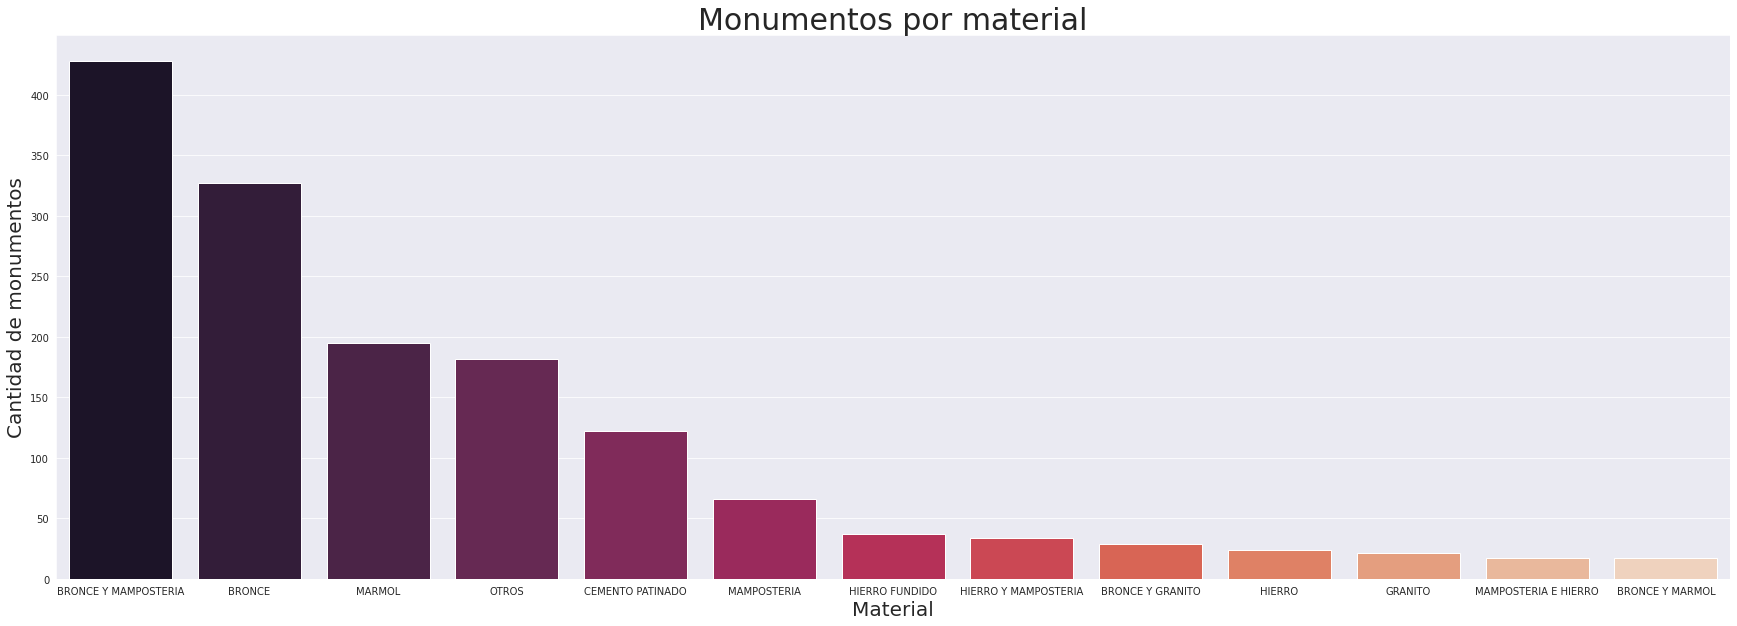

In [ ]:
##Graficamos la cuenta de monumentos según material
plt.figure(figsize=(30,10))
ax=sns.countplot(x=mn.MATERIAL, data=mn.MATERIAL, palette='rocket', order= mn['MATERIAL'].value_counts().index )
plt.xlabel("Material", size =20)
plt.ylabel("Cantidad de monumentos", size=20)
plt.title ("Monumentos por material", size=30)
sns.set({'figure.figsize':(20,10)})

In [ ]:
#El gráfico nos permite visualizar que los materiales agrupados como "OTROS", representan un alto porcentaje del total


ValueError: ignored

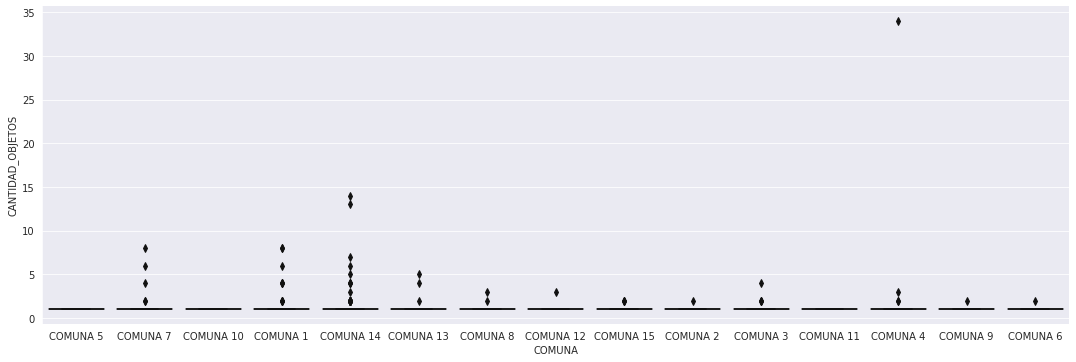

In [ ]:
# Mediante un boxplot intentamos visualizar la cantidad de objetos por monumento en cada comuna
sns.catplot(x=mn.COMUNA, y=mn.CANTIDAD_OBJETOS,
                data=mn, 
                kind="box",
                palette = "rocket",
                height = 5 ,aspect=3)
plt.show()

In [ ]:
# Lo que podemos ver con esta gráfica es que casi en su totalidad los monumentos cuentan unicamente con un objeto
# en su composición, salvo casos aislados.

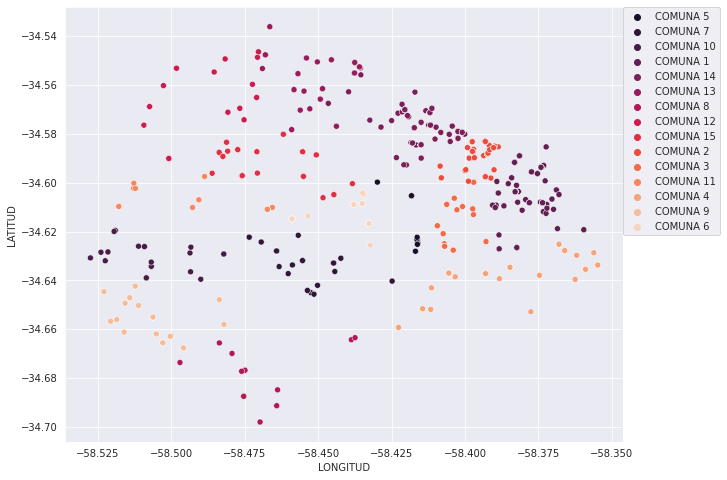

In [ ]:
##Mostramos con "LONGITUD" Y "LATITUD" la ubicación de cada monumento discriminado por comuna
plt.figure(figsize=(10,8))
sns.scatterplot(mn['LONGITUD'],mn['LATITUD'],hue=mn['COMUNA'],palette='rocket')
plt.legend(loc=(1,0.475))
plt.show()

In [ ]:
##Generamos una pivot table para poder graficar luego la distribución por materiales de los monumentos en cada comuna.
tabla = pd.pivot_table(mn,values = ['MATERIAL'], columns =  mn.MATERIAL ,index = [mn.COMUNA] , aggfunc = 'count')
print (tabla)

          MATERIAL                   ...             
MATERIAL    BRONCE BRONCE Y GRANITO  ... MARMOL OTROS
COMUNA                               ...             
COMUNA 1      31.0              6.0  ...   51.0  32.0
COMUNA 10      6.0              NaN  ...    2.0   5.0
COMUNA 11      1.0              NaN  ...    1.0   5.0
COMUNA 12      9.0              NaN  ...    6.0   1.0
COMUNA 13      9.0              3.0  ...    5.0  10.0
COMUNA 14    153.0             11.0  ...   74.0  36.0
COMUNA 15     10.0              NaN  ...    5.0   6.0
COMUNA 2      27.0              5.0  ...   16.0  20.0
COMUNA 3      22.0              1.0  ...    7.0  16.0
COMUNA 4      12.0              NaN  ...   10.0   9.0
COMUNA 5       1.0              NaN  ...    2.0   9.0
COMUNA 6       6.0              NaN  ...    5.0   9.0
COMUNA 7      24.0              NaN  ...    4.0  15.0
COMUNA 8      10.0              2.0  ...    2.0   3.0
COMUNA 9       6.0              1.0  ...    5.0   6.0

[15 rows x 13 columns]


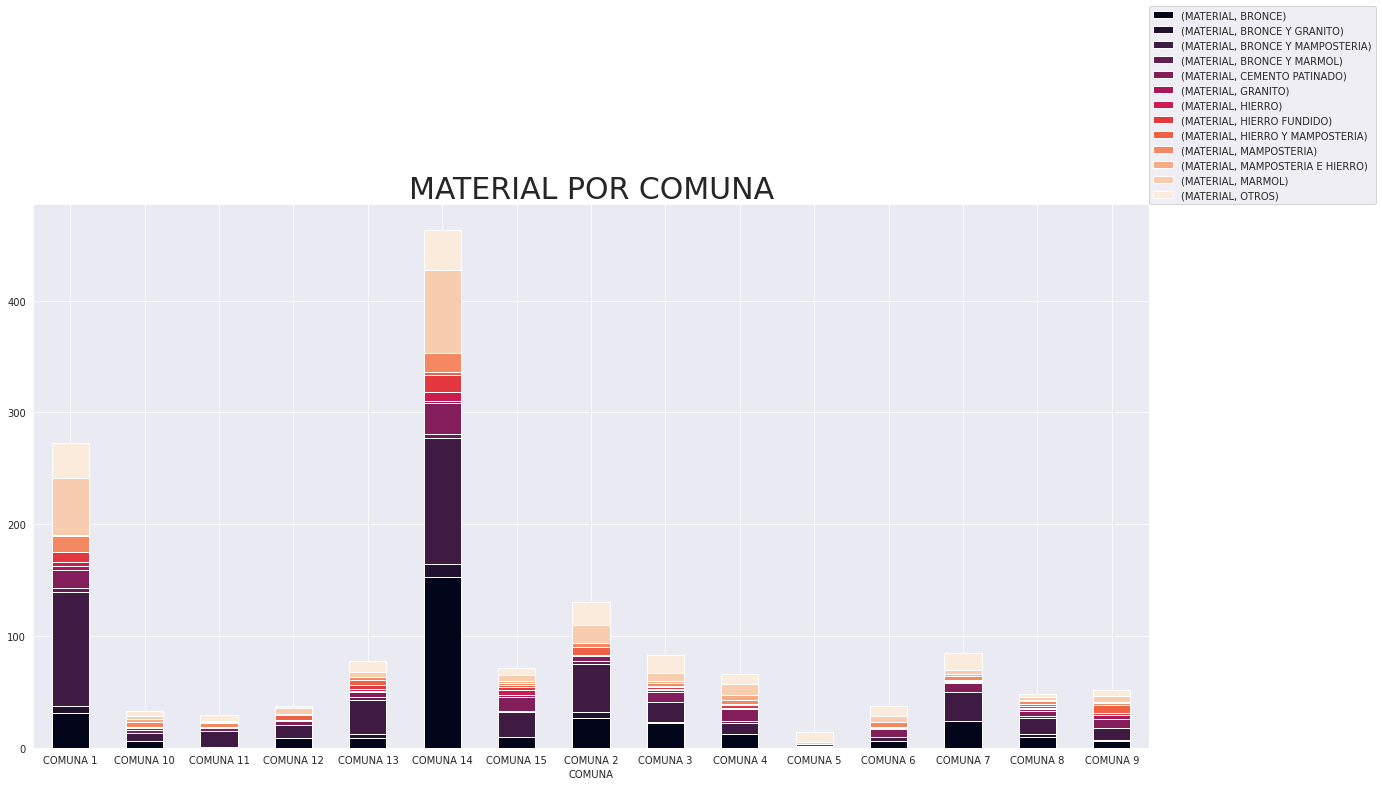

In [ ]:
##Graficamos 
tabla.plot(kind='bar', figsize = (20,10), stacked = True, colormap='rocket')
plt.title("MATERIAL POR COMUNA", size=30)
plt.xticks(rotation=0)
plt.colorbar=False
plt.legend(loc = (1,1))
plt.show()

##Aprendizaje


In [ ]:
#En esta etapa vamos a entrenar a nuestros modelos para predecir en base a la "LONGITUD", "CODIGO_POSTAL" Y "ALTURA"
#nos de como resultado cual es la calle en la que se encuentra el monumento.

In [ ]:
#Revisamos nuevamente el dataset para confirmar que esten los valores que vamos a utilizar y si tiene NaN´s
mn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2232
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CANTIDAD_OBJETOS  2113 non-null   int64  
 1   MATERIAL          2101 non-null   object 
 2   CALLE             2113 non-null   object 
 3   ALTURA            1513 non-null   float64
 4   BARRIO            1921 non-null   object 
 5   COMUNA            2113 non-null   object 
 6   CODIGA_POSTAL     1504 non-null   float64
 7   LATITUD           2103 non-null   float64
 8   LONGITUD          2103 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 245.1+ KB


In [ ]:
#Eliminamos valores NaN´s de las variables que vamos a utilizar
mn.dropna(subset = ["CODIGA_POSTAL", "ALTURA", "CALLE", "LATITUD", "LONGITUD" ], inplace=True)

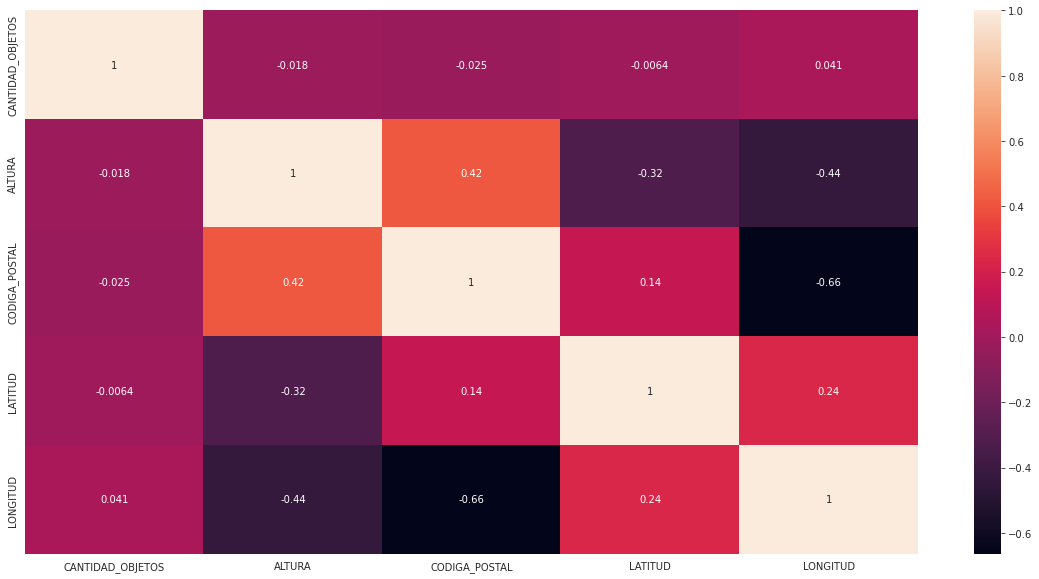

In [ ]:
#Revisamos cuales son las variables que cuentan con mayor correlación
mnmat=mn.corr()
sns.heatmap(mnmat, annot=True)

In [ ]:
#Definimos x e y
x = mn.loc[:,['ALTURA', 'CODIGA_POSTAL','LONGITUD']]
y = mn.loc[:,['CALLE']]

In [ ]:
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

In [ ]:
#Vemos como queda x
x

,ALTURA,CODIGA_POSTAL,LONGITUD
0,883.0,1218.0,-58.416328
2,1410.0,1406.0,-58.444763
3,3800.0,1407.0,-58.482175
4,6400.0,1408.0,-58.524018
5,90.0,1003.0,-58.370369
...,...,...,...
2226,3951.0,1425.0,-58.417884
2228,2542.0,1440.0,-58.502948
2229,3670.0,1254.0,-58.416867
2231,16802.0,1439.0,-58.469811


In [ ]:
#Definimos el tamaño de la muestra de test y la cantidad de veces que repetimos el experimento
#Tomamos un tamaño promedio del 25%
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=15)


In [ ]:
norm = MinMaxScaler().fit(X_train)

In [ ]:
X_train_norm = norm.transform(X_train)

In [ ]:
X_test_norm = norm.transform(X_test)

##Logistic Regression

In [ ]:
# Creamos el modelo de regresion logistica y usamos Cross Validation para ver cual hiperparametro ajusta mejor
param_lr = {'C':[1, 10, 100, 1000], "penalty": ("l1", "l2"), "solver":("lbfgs", "liblinear")}
lr = LogisticRegression()
clf_lr = GridSearchCV(lr, param_grid = param_lr , scoring= 'accuracy', refit = True, cv = 3)
clf_lr.fit(X_train_norm, y_train.ravel())

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ('l1', 'l2'),
                         'solver': ('lbfgs', 'liblinear')},
             scoring='accuracy')

In [ ]:
#Guardamos los resultados Logistic Regression
scores = clf_lr.cv_results_


In [ ]:
print("Los mejores parametros son %s con un score de %0.2f" % (clf_lr.best_params_, clf_lr.best_score_))


Los mejores parametros son {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'} con un score de 0.52


##KNN

In [ ]:
#Definimos el modelo KNN
neigh = KNeighborsClassifier()

In [ ]:
#Le damos valores a los hiperparametros del modelo 1, 10, 100 y 200
param_neigh = {'n_neighbors': [1, 10, 100, 200]}

In [ ]:
#Usamos Cross Validation para ver cual hiperparametro ajusta mejor
clf = GridSearchCV(neigh, param_grid = param_neigh,scoring= 'accuracy', refit = True, cv = 3)
clf.fit(X_train_norm, y_train.ravel())

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 10, 100, 200]}, scoring='accuracy')

In [ ]:
#Guardamos los resultados del KNN
scores = clf.cv_results_


In [ ]:
print("Los mejores parametros son %s con un score de %0.2f" % (clf.best_params_, clf.best_score_))


Los mejores parametros son {'n_neighbors': 1} con un score de 0.93


##SVM

In [ ]:
#Creamos el modelo Support Vector Classification (SVC)
param_svc = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}


In [ ]:
svc = svm.SVC()


In [ ]:
#Usamos Cross Validation para ver cual hiperparametro ajusta mejor
clf_svm = GridSearchCV(svc, param_grid = param_svc, refit = True, cv = 3)


In [ ]:
clf_svm.fit(X_train_norm, y_train.ravel())


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')})

In [ ]:
#Guardamos los resultados del SVM
scores = clf_svm.cv_results_

In [ ]:
print("Los mejores parametros son %s con un score de %0.2f" % (clf_svm.best_params_, clf_svm.best_score_))


Los mejores parametros son {'C': 1000, 'gamma': 10, 'kernel': 'rbf'} con un score de 0.93


##Random Forest

In [ ]:
rf= RandomForestClassifier(class_weight='balanced', random_state=1)


In [ ]:
param_trees = {'n_estimators': [50, 100, 200], 
               'max_features': [1, 5, 8], 
               'max_depth': [5, 20, 50, 70], 
               'min_samples_leaf':[1, 5, 8, 10]}

In [ ]:
#Usamos Cross Validation para ver cual hiperparametro ajusta mejor
clf_rf = GridSearchCV(rf, param_grid = param_trees,scoring= 'accuracy', refit = True, cv = 3)
clf_rf.fit(X_train_norm, y_train.ravel())

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             param_grid={'max_depth': [5, 20, 50, 70],
                         'max_features': [1, 5, 8],
                         'min_samples_leaf': [1, 5, 8, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
#Guardamos los resultados del random forest
scores = clf_rf.cv_results_


In [ ]:
print("Los mejores parametros son %s con un score de %0.2f" % (clf_rf.best_params_, clf_rf.best_score_))


Los mejores parametros son {'max_depth': 50, 'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 100} con un score de 0.93


##Evaluación de los modelos

In [ ]:
#Evaluamos los tres modelos con los score iguales y mas altos

In [ ]:
#KNN

In [ ]:
 clf.fit(X_train_norm, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 10, 100, 200]}, scoring='accuracy')

In [ ]:
# Generamos predicciones con el modelo entrenado para las muestras de Test, utilizando solo X_test_norm
ypred = clf_svm.predict(X_test_norm)

In [ ]:
# Computamos el accuracy, comparando y_test vs ypred
test_acc = accuracy_score(y_test, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.9095744680851063


In [ ]:
#SVM

In [ ]:
 clf_svm.fit(X_train_norm, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')})

In [ ]:
# Generamos predicciones con el modelo entrenado para las muestras de Test, utilizando solo X_test_norm
ypred1 = clf_svm.predict(X_test_norm)

In [ ]:
# Computamos el accuracy, comparando y_test vs ypred
test_acc1 = accuracy_score(y_test, ypred1)
print("El accuracy es " + str(test_acc1))

El accuracy es 0.9095744680851063


In [ ]:
#Random Forest

In [ ]:
 clf_rf.fit(X_train_norm, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             param_grid={'max_depth': [5, 20, 50, 70],
                         'max_features': [1, 5, 8],
                         'min_samples_leaf': [1, 5, 8, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Generamos predicciones con el modelo entrenado para las muestras de Test, utilizando solo X_test_norm
ypred2 = clf_svm.predict(X_test_norm)

In [ ]:
# Computamos el accuracy, comparando y_test vs ypred
test_acc2 = accuracy_score(y_test, ypred2)
print("El accuracy es " + str(test_acc2))

El accuracy es 0.9095744680851063


In [ ]:
pd.DataFrame(data = [["KNN",0.9095744680851063 ,0.93],
                     ["SVM", 0.9095744680851063, 0.93],
                     ["Random Forest",0.9095744680851063, 0.93]
                     ],
             columns = ['Modelo',
                      'Accuracy', 
                      'Train'])

,Modelo,Accuracy,Train
0,KNN,0.909574,0.93
1,SVM,0.909574,0.93
2,Random Forest,0.909574,0.93
